## ライブラリのインポート

In [29]:
from sudachipy import tokenizer
from sudachipy import dictionary
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import japanize_matplotlib
from collections import Counter
from gensim.models import Word2Vec

## sudachiを試す

In [30]:
# full辞書を使用して辞書オブジェクトを生成
tokenizer_obj = dictionary.Dictionary(dict_type="full").create()

# 形態素解析の粒度設定
mode = tokenizer.Tokenizer.SplitMode.C  # C: 最も粗い、A: 最も細かい

# 解析対象テキスト
text = "スクラムマスターとしてチームのファシリテーションと課題管理を行いました。 顧客との要件確認や仕様調整を円滑に進めました。 既存システムのリファクタリングやパフォーマンスチューニングを実施しました。 アジャイル手法で開発を進め、定期的なスプリントレビューで改善を行いました。 フロントエンドではReactやVueを用いたSPAの構築を担当しました。"

# 形態素解析を実行
morphemes = tokenizer_obj.tokenize(text, mode)

# 結果を表示
for m in morphemes:
    print(
        f"{m.surface()}\t{','.join(m.part_of_speech())}\t"
        f"{m.dictionary_form()}\t{m.reading_form()}\t{m.normalized_form()}"
    )


スクラム	名詞,普通名詞,一般,*,*,*	スクラム	スクラム	スクラム
マスター	名詞,普通名詞,サ変可能,*,*,*	マスター	マスター	マスター
と	助詞,格助詞,*,*,*,*	と	ト	と
し	動詞,非自立可能,*,*,サ行変格,連用形-一般	する	シ	為る
て	助詞,接続助詞,*,*,*,*	て	テ	て
チーム	名詞,普通名詞,一般,*,*,*	チーム	チーム	チーム
の	助詞,格助詞,*,*,*,*	の	ノ	の
ファシリテーション	名詞,普通名詞,一般,*,*,*	ファシリテーション	ファシリテーション	ファシリテーション
と	助詞,格助詞,*,*,*,*	と	ト	と
課題	名詞,普通名詞,一般,*,*,*	課題	カダイ	課題
管理	名詞,普通名詞,サ変可能,*,*,*	管理	カンリ	管理
を	助詞,格助詞,*,*,*,*	を	ヲ	を
行い	動詞,一般,*,*,五段-ワア行,連用形-一般	行う	オコナイ	行う
まし	助動詞,*,*,*,助動詞-マス,連用形-一般	ます	マシ	ます
た	助動詞,*,*,*,助動詞-タ,終止形-一般	た	タ	た
。	補助記号,句点,*,*,*,*	。	。	。
 	空白,*,*,*,*,*	 	キゴウ	 
顧客	名詞,普通名詞,一般,*,*,*	顧客	コキャク	顧客
と	助詞,格助詞,*,*,*,*	と	ト	と
の	助詞,格助詞,*,*,*,*	の	ノ	の
要件	名詞,普通名詞,一般,*,*,*	要件	ヨウケン	要件
確認	名詞,普通名詞,サ変可能,*,*,*	確認	カクニン	確認
や	助詞,副助詞,*,*,*,*	や	ヤ	や
仕様	名詞,普通名詞,一般,*,*,*	仕様	シヨウ	仕様
調整	名詞,普通名詞,サ変可能,*,*,*	調整	チョウセイ	調整
を	助詞,格助詞,*,*,*,*	を	ヲ	を
円滑	形状詞,一般,*,*,*,*	円滑	エンカツ	円滑
に	助動詞,*,*,*,助動詞-ダ,連用形-ニ	だ	ニ	だ
進め	動詞,一般,*,*,下一段-マ行,連用形-一般	進める	ススメ	進める
まし	助動詞,*,*,*,助動詞-マス,連用形-一般	ます	マシ	ます
た	助動詞,*,*,*,助動詞-タ,終止形-一般	た	タ	た
。	補助記号,句点,*,*,*,*	。	。	。
 	空白,*,*,*,*,*	 	キゴウ	 
既存	名詞,

/var/folders/rb/64gq3h_s05lg4ctppr9f3wxh0000gn/T/ipykernel_39553/720976900.py:2: DeprecationWarning: Parameter dict_type of Dictionary() is deprecated, use dict instead
  tokenizer_obj = dictionary.Dictionary(dict_type="full").create()


## csvファイルを読み込む

In [31]:
df = pd.read_csv('../data/raw/user_work_histories.csv', usecols=['user_id','project_name','description','role']) # 列名で指定
df

,user_id,project_name,description,role
0,1,スマホアプリ開発,SNSアプリ開発\n[主な担当]\nドキュメント作成\nテスト実施\nインフラ構築\n技術検証,プログラマー
1,1,医療情報システム開発,オンプレミス環境からAWSへのクラウド移行を主導しました。 新技術の調査やPoCを行い、アー...,技術リーダー
2,1,データ分析基盤の構築,アジャイル手法で開発を進め、定期的なスプリントレビューで改善を行いました。 自動テストの導入...,QAエンジニア
3,1,動画配信サービス構築,セキュリティ強化プロジェクト\n[主な担当]\n要件定義\nパフォーマンスチューニング\nリ...,フロントエンドエンジニア
4,1,教育向けアプリ開発,医療情報システム開発\n[主な担当]\nセキュリティ対応\nプログラミング\nレビュー\nU...,フロントエンドエンジニア
...,...,...,...,...
906,298,既存システムの機能追加,自動テストの導入によりリリースサイクルを短縮しました。 オンプレミス環境からAWSへのクラウ...,インフラエンジニア
907,299,金融系システム開発,動画配信サービス構築\n[主な担当]\n運用保守\nデバッグ\nデータベース設計\nリファク...,エンジニアリングマネージャ
908,299,スマホアプリ開発,オンプレミス環境からAWSへのクラウド移行を主導しました。 新技術の調査やPoCを行い、アー...,テクニカルリード
909,300,セキュリティ強化プロジェクト,既存システムの機能追加\n[主な担当]\n顧客折衝\n技術検証\nメンバーマネジメント\nプ...,技術リーダー


## 名詞のみ表示

In [32]:
def extract_nouns(text: str):
    # full辞書を使用して辞書オブジェクトを生成
    tokenizer_obj = dictionary.Dictionary(dict="full").create()
    # 形態素解析の粒度設定(C: 最も粗い)
    mode = tokenizer.Tokenizer.SplitMode.C
    
    # 形態素解析を実行
    morphemes = tokenizer_obj.tokenize(text, mode)
    
    nouns = []
    for m in morphemes:
        # 品詞情報を取得
        pos = m.part_of_speech()[0]
        if pos == '名詞':
            nouns.append(m.surface())
    return nouns

# 処理対象の列を定義
existing_cols = ['project_name', 'description', 'role']

# 3列を順に処理して名詞を出力
for col in existing_cols:
    print(col)
    print("-----------------")
    for text in df[col].dropna().astype(str):
        nouns = extract_nouns(text)
        print(nouns)

project_name
-----------------
['スマホアプリ', '開発']
['医療情報システム', '開発']
['データ分析', '基盤', '構築']
['動画配信サービス', '構築']
['教育', 'アプリ', '開発']
['セキュリティ', '強化', 'プロジェクト']
['スマホアプリ', '開発']
['教育', 'アプリ', '開発']
['医療情報システム', '開発']
['医療情報システム', '開発']
['AI', 'チャットボット', '構築']
['クラウド', '移行', 'プロジェクト']
['金融', 'システム開発']
['SNS', 'アプリ', '開発']
['SNS', 'アプリ', '開発']
['スマホアプリ', '開発']
['クラウド', '移行', 'プロジェクト']
['クラウド', '移行', 'プロジェクト']
['IoT', 'プラットフォーム', '開発']
['IoT', 'プラットフォーム', '開発']
['ゲーム開発', 'プロジェクト']
['SNS', 'アプリ', '開発']
['スマホアプリ', '開発']
['ゲーム開発', 'プロジェクト']
['既存', 'システム', '機能', '追加']
['ゲーム開発', 'プロジェクト']
['SNS', 'アプリ', '開発']
['金融', 'システム開発']
['医療情報システム', '開発']
['IoT', 'プラットフォーム', '開発']
['教育', 'アプリ', '開発']
['SNS', 'アプリ', '開発']
['ゲーム開発', 'プロジェクト']
['ゲーム開発', 'プロジェクト']
['IoT', 'プラットフォーム', '開発']
['既存', 'システム', '機能', '追加']
['セキュリティ', '強化', 'プロジェクト']
['ECサイト', 'リニューアル']
['ECサイト', 'リニューアル']
['Webサービス', '開発']
['SNS', 'アプリ', '開発']
['SNS', 'アプリ', '開発']
['SNS', 'アプリ', '開発']
['ECサイト', 'リニューアル']
['ゲーム開発', 'プロジェクト']
['ゲーム開発', 'プロ

## 各行ごとに名詞をリスト化

In [33]:
# 行単位で3列のテキストを結合してから名詞抽出
row_texts = (
    df[existing_cols]
    .fillna('')
    .astype(str)
    .agg('。'.join, axis=1)  # セパレータで連結（任意で変更可）
)

nouns_list = [extract_nouns(t) for t in row_texts]

for i, nouns in enumerate(nouns_list):
    print(f'{i}: {nouns}')

0: ['スマホアプリ', '開発', 'SNS', 'アプリ', '開発', '担当', 'ドキュメント', '作成', 'テスト', '実施', 'インフラ', '構築', '技術', '検証', 'プログラマー']
1: ['医療情報システム', '開発', 'オンプレミス', '環境', 'AWS', 'クラウド', '移行', '主導', '新技術', '調査', 'PoC', 'アーキテクチャ', '改善', '提案', 'バックエンド', 'API', '設計', '実装', 'Node', 'js', 'Django', 'フロントエンド', 'React', 'Vue', 'SPA', '構築', '担当', '自動', 'テスト', '導入', 'リリース', 'サイクル', '短縮', '技術', 'リーダー']
2: ['データ分析', '基盤', '構築', 'アジャイル', '手法', '開発', '定期的', 'スプリント', 'レビュー', '改善', '自動', 'テスト', '導入', 'リリース', 'サイクル', '短縮', 'ユーザビリティテスト', 'A', 'B', 'テスト', 'UI', 'UX', '改善', 'オンプレミス', '環境', 'AWS', 'クラウド', '移行', '主導', 'フロントエンド', 'React', 'Vue', 'SPA', '構築', '担当', 'QA', 'エンジニア']
3: ['動画配信サービス', '構築', 'セキュリティ', '強化', 'プロジェクト', '担当', '要件定義', 'パフォーマンス', 'チューニング', 'リファクタリング', 'セキュリティ', '対応', 'データベース設計', 'メンバー', 'マネジメント', 'フロントエンド', 'エンジニア']
4: ['教育', 'アプリ', '開発', '医療情報システム', '開発', '担当', 'セキュリティ', '対応', 'プログラミング', 'レビュー', 'UI', 'UX', '設計', 'フロントエンド', 'エンジニア']
5: ['セキュリティ', '強化', 'プロジェクト', '業務効率化', 'ツール', '開発', '担当', 'デバッグ', 'UI', 'UX'

# データ集計（個人ごと）

## user_idごとに何種類の名詞があるか

In [34]:
# user_idを含むデータを読み込む
df_with_user = pd.read_csv('../data/raw/user_work_histories.csv', usecols=['user_id', 'project_name', 'description', 'role'])

# full辞書を使用して辞書オブジェクトを生成
tokenizer_obj = dictionary.Dictionary(dict="full").create()
# 形態素解析の粒度設定(C: 最も粗い)
mode = tokenizer.Tokenizer.SplitMode.C

# 各user_idごとに名詞を抽出
user_nouns = {}
user_order = []  # CSVの出現順を保持

for _, row in df_with_user.iterrows():
    user_id = row['user_id']
    
    if user_id not in user_nouns:
        user_nouns[user_id] = set()
        user_order.append(user_id)  # 初出順を記録
    
    # project_name, description, roleから名詞を抽出
    for col in ['project_name', 'description', 'role']:
        text = str(row[col])
        if pd.notna(text):
            tokens = tokenizer_obj.tokenize(text, mode)
            for token in tokens:
                # 品詞が名詞の場合のみ抽出
                if token.part_of_speech()[0] == '名詞':
                    user_nouns[user_id].add(token.surface())

# user_id1〜5までの生データをCSV出現順で表示
displayed_count = 0
for user_id in user_order:
    if displayed_count >= 5:
        break
    if user_id in [1, 2, 3, 4, 5]:
        print(f"\nuser_id: {user_id}")
        print(f"抽出された名詞: {sorted(user_nouns[user_id])}")
        print(f"名詞種類数: {len(user_nouns[user_id])}")
        displayed_count += 1

# 結果を集計（CSV出現順）
result_df = pd.DataFrame([
    {'user_id': user_id, 'noun_count': len(user_nouns[user_id])}
    for user_id in user_order
])

print("\n総人材数:")
print(len(result_df))
print("\n名詞種類数の統計:")
# describeメソッドで統計情報を表示
print(result_df['noun_count'].describe())
print("\n各人材の名詞種類数:")
result_df


user_id: 1
抽出された名詞: ['A', 'API', 'AWS', 'B', 'Django', 'Node', 'PoC', 'QA', 'React', 'SNS', 'SPA', 'UI', 'UX', 'Vue', 'js', 'アジャイル', 'アプリ', 'アーキテクチャ', 'インフラ', 'エンジニア', 'オンプレミス', 'クラウド', 'サイクル', 'スプリント', 'スマホアプリ', 'セキュリティ', 'チューニング', 'テスト', 'データベース設計', 'データ分析', 'ドキュメント', 'バックエンド', 'パフォーマンス', 'フロントエンド', 'プログラマー', 'プログラミング', 'プロジェクト', 'マネジメント', 'メンバー', 'ユーザビリティテスト', 'リファクタリング', 'リリース', 'リーダー', 'レビュー', '主導', '作成', '動画配信サービス', '医療情報システム', '基盤', '定期的', '実施', '実装', '対応', '導入', '強化', '手法', '技術', '担当', '提案', '改善', '教育', '新技術', '検証', '構築', '環境', '短縮', '移行', '自動', '要件定義', '設計', '調査', '開発']
名詞種類数: 72

user_id: 2
抽出された名詞: ['React', 'SE', 'SPA', 'UI', 'UX', 'Vue', 'アジャイル', 'アプリ', 'インフラ', 'エンジニア', 'システム', 'スクラム', 'スプリント', 'スマホアプリ', 'セキュリティ', 'チューニング', 'チーム', 'ツール', 'テスト', 'デバッグ', 'データ分析', 'ドキュメント', 'パフォーマンス', 'ファシリテーション', 'フロントエンド', 'プロジェクト', 'マスター', 'リファクタリング', 'リーダー', 'レビュー', '仕様', '作成', '保守', '医療情報システム', '基盤', '定期的', '実施', '実装', '対応', '強化', '手法', '折衝', '担当', '改善', '教育', '既存', '業務効率化', '構築', '確認',

,user_id,noun_count
0,1,72
1,2,58
2,3,34
3,4,77
4,5,43
...,...,...
295,296,67
296,297,32
297,298,61
298,299,40


### csvファイルに保存

In [35]:
# 元のCSVファイル全体を読み込む
df_original = pd.read_csv('../data/raw/user_work_histories.csv')

# user_idごとの名詞種類数を計算
user_nouns = {}

# 必要な列だけを取得して処理
for _, row in df_original.iterrows():
    user_id = row['user_id']
    
    if user_id not in user_nouns:
        user_nouns[user_id] = set()
    
    # project_name, description, roleから名詞を抽出
    for col in ['project_name', 'description', 'role']:
        text = str(row[col])
        if pd.notna(text) and text != 'nan':
            tokens = tokenizer_obj.tokenize(text, mode)
            for token in tokens:
                # 品詞が名詞の場合のみ抽出
                if token.part_of_speech()[0] == '名詞':
                    user_nouns[user_id].add(token.surface())

# 各user_idの名詞種類数を辞書に変換
user_noun_counts = {user_id: len(nouns) for user_id, nouns in user_nouns.items()}

# 元のDataFrameに名詞種類数を追加
df_original['noun_count'] = df_original['user_id'].map(user_noun_counts)

# history_idの右列にnoun_countを配置するため、列の順序を変更
cols = df_original.columns.tolist()
history_id_index = cols.index('history_id')

# noun_countをhistory_idの次に配置
new_cols = cols[:history_id_index+1] + ['noun_count'] + [c for c in cols[history_id_index+1:] if c != 'noun_count']
df_with_noun_count = df_original[new_cols]

# 新しいCSVファイルとして保存
output_filename = '../data/processed/user_work_histories_with_noun_count-sudachi.csv'
df_with_noun_count.to_csv(output_filename, index=False)

print(f"✓ 新しいCSVファイルを保存しました: {output_filename}")
print(f"✓ 総レコード数: {len(df_with_noun_count)}")
print(f"✓ 総人材数: {df_with_noun_count['user_id'].nunique()}")
print("\n名詞種類数の統計:")
print(df_with_noun_count.groupby('user_id')['noun_count'].first().describe())

# 最初の数行を表示して確認
df_with_noun_count.head(10)

✓ 新しいCSVファイルを保存しました: ../data/processed/user_work_histories_with_noun_count-sudachi.csv
✓ 総レコード数: 911
✓ 総人材数: 300

名詞種類数の統計:
count    300.000000
mean      45.663333
std       19.090262
min        8.000000
25%       32.000000
50%       46.500000
75%       60.250000
max       87.000000
Name: noun_count, dtype: float64


,id,user_id,history_id,noun_count,project_name,description,role,start_date,end_date,HTML,...,GCP,Docker,Kubernetes,MySQL,PostgreSQL,MongoDB,Git,Linux,Agile,Scrum
0,1,1,1,72,スマホアプリ開発,SNSアプリ開発\n[主な担当]\nドキュメント作成\nテスト実施\nインフラ構築\n技術検証,プログラマー,2016-11-28,NaN,1,...,1,0,0,0,1,0,0,0,1,0
1,2,1,2,72,医療情報システム開発,オンプレミス環境からAWSへのクラウド移行を主導しました。 新技術の調査やPoCを行い、アー...,技術リーダー,2016-04-17,2018-01-18,1,...,1,0,0,0,1,0,0,0,1,0
2,3,1,3,72,データ分析基盤の構築,アジャイル手法で開発を進め、定期的なスプリントレビューで改善を行いました。 自動テストの導入...,QAエンジニア,2021-09-27,2022-10-04,1,...,1,0,0,0,1,0,0,0,1,0
3,4,1,4,72,動画配信サービス構築,セキュリティ強化プロジェクト\n[主な担当]\n要件定義\nパフォーマンスチューニング\nリ...,フロントエンドエンジニア,2019-02-16,2020-03-25,1,...,1,0,0,0,1,0,0,0,1,0
4,5,1,5,72,教育向けアプリ開発,医療情報システム開発\n[主な担当]\nセキュリティ対応\nプログラミング\nレビュー\nU...,フロントエンドエンジニア,2017-11-01,2019-10-20,1,...,1,0,0,0,1,0,0,0,1,0
5,6,2,1,58,セキュリティ強化プロジェクト,業務効率化ツール開発\n[主な担当]\nデバッグ\nUI/UX設計\nテスト設計,フロントエンドエンジニア,2016-05-20,2016-09-02,0,...,1,1,0,0,0,0,1,0,0,0
6,7,2,2,58,スマホアプリ開発,データ分析基盤の構築\n[主な担当]\nインフラ構築\n運用保守\n顧客折衝\nドキュメント...,SE,2021-10-10,2023-09-26,0,...,1,1,0,0,0,0,1,0,0,0
7,8,2,3,58,教育向けアプリ開発,要件定義から設計、実装、テストまで幅広く担当しました。 顧客との要件確認や仕様調整を円滑に進...,開発リーダー,2023-01-06,2024-02-04,0,...,1,1,0,0,0,0,1,0,0,0
8,9,2,4,58,医療情報システム開発,スクラムマスターとしてチームのファシリテーションと課題管理を行いました。 顧客との要件確認や...,開発リーダー,2020-06-05,2021-12-27,0,...,1,1,0,0,0,0,1,0,0,0
9,10,3,1,34,医療情報システム開発,バックエンドAPIの設計と実装をNode.jsやDjangoで行いました。 複数チーム間の連...,バックエンドエンジニア,2022-11-17,2024-03-21,1,...,0,0,0,1,0,0,0,0,0,0


### 可視化

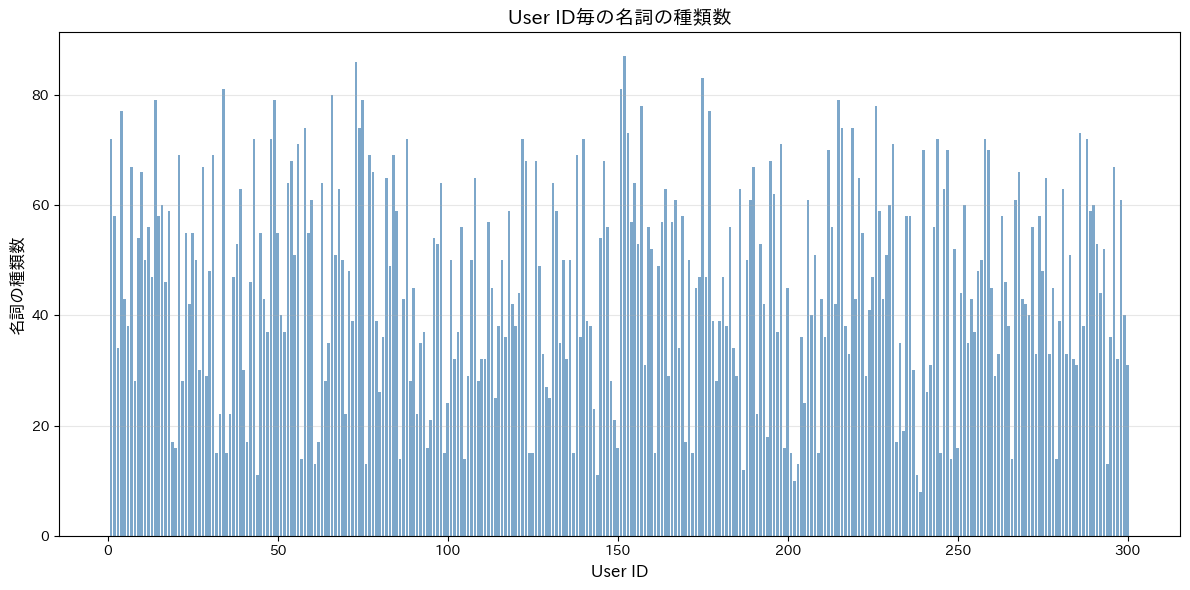

名詞の種類数の統計:
count    300.000000
mean      45.663333
std       19.090262
min        8.000000
25%       32.000000
50%       46.500000
75%       60.250000
max       87.000000
Name: noun_variety_count, dtype: float64


In [36]:
# user_work_histories_with_noun_count.csvを読み込む
df_noun = pd.read_csv('../data/processed/user_work_histories_with_noun_count-sudachi.csv')

# user_id毎にnoun_countをグループ化して、ユニークな名詞の種類数を取得
# 各user_idで最初のnoun_count値を取得(同じuser_idは同じnoun_count値を持つ)
noun_variety_by_user = df_noun.groupby('user_id')['noun_count'].first().reset_index()
noun_variety_by_user.columns = ['user_id', 'noun_variety_count']

# 日本語フォントの設定
# matplotlib.rcParams['font.family'] = ['IPAexGothic']
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け対策

# 可視化
plt.figure(figsize=(12, 6))
plt.bar(noun_variety_by_user['user_id'], noun_variety_by_user['noun_variety_count'], color='steelblue', alpha=0.7)
plt.xlabel('User ID', fontsize=12)
plt.ylabel('名詞の種類数', fontsize=12)
plt.title('User ID毎の名詞の種類数', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 統計情報を表示
print("名詞の種類数の統計:")
print(noun_variety_by_user['noun_variety_count'].describe())

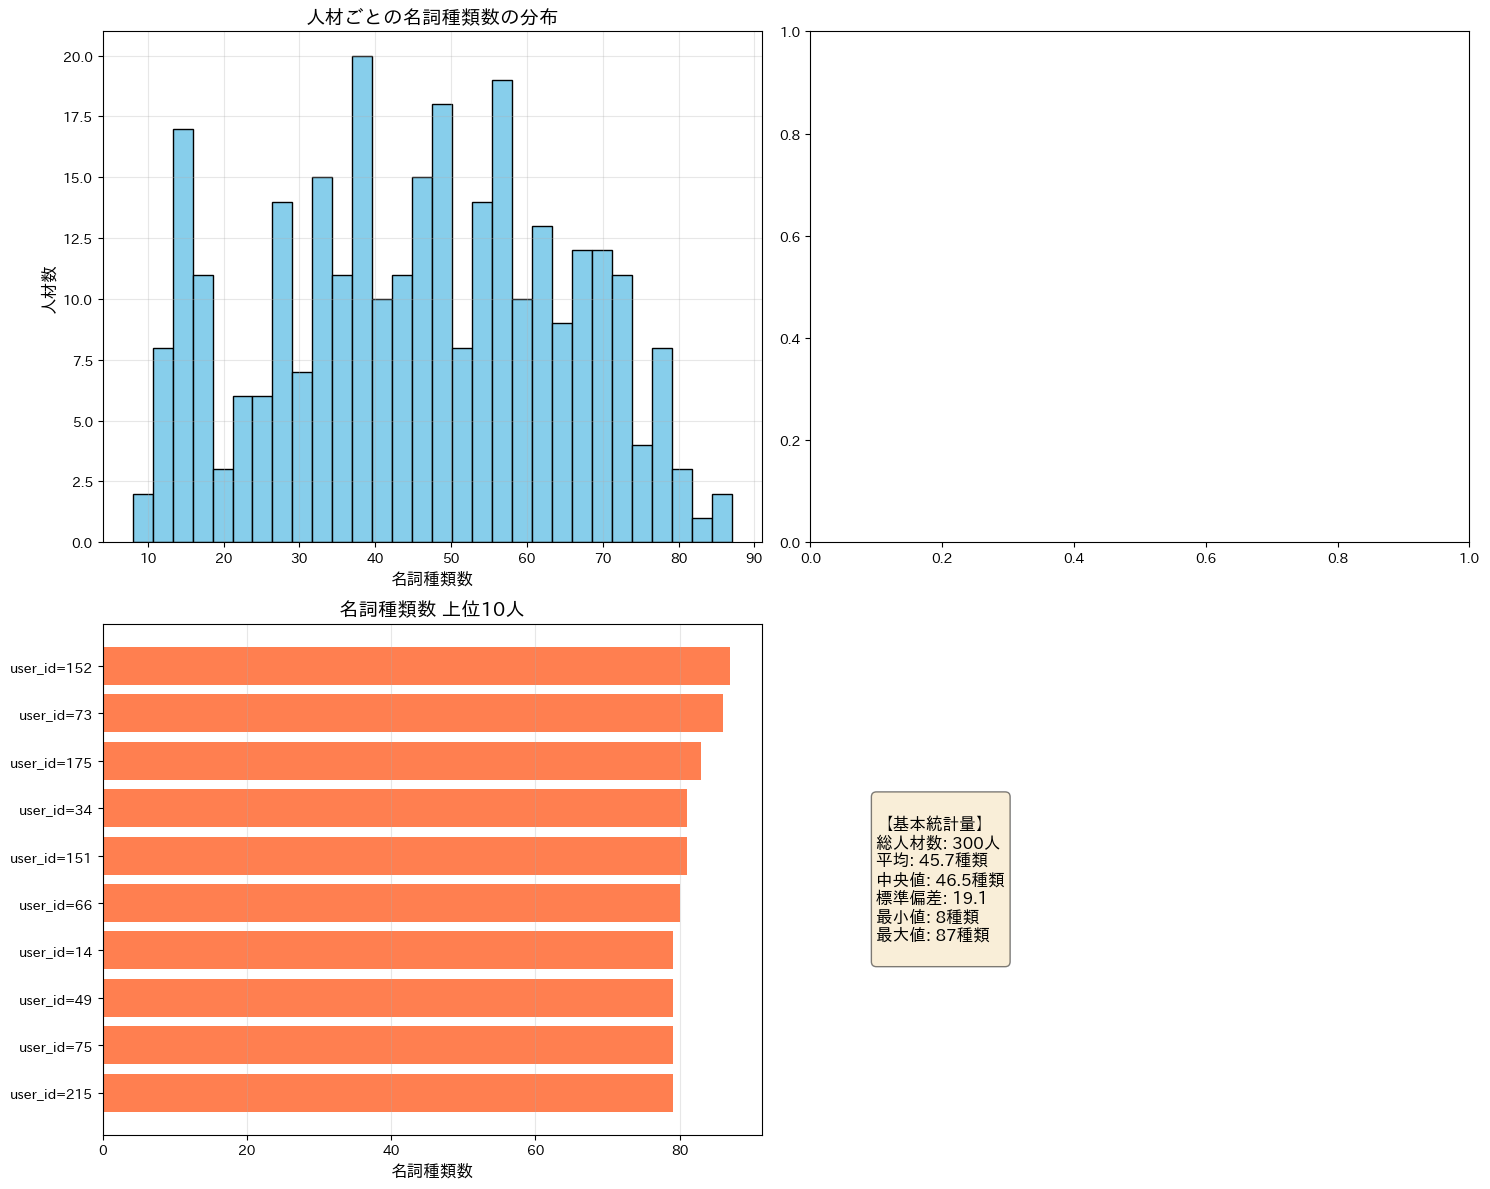

In [37]:
# 図のサイズを設定
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 名詞種類数の分布（ヒストグラム）
axes[0, 0].hist(result_df['noun_count'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('名詞種類数', fontsize=12)
axes[0, 0].set_ylabel('人材数', fontsize=12)
axes[0, 0].set_title('人材ごとの名詞種類数の分布', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# # 2. 名詞種類数の箱ひげ図
# axes[0, 1].boxplot(result_df['noun_count'], vert=True)
# axes[0, 1].set_ylabel('名詞種類数', fontsize=12)
# axes[0, 1].set_title('名詞種類数の箱ひげ図', fontsize=14, fontweight='bold')
# axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. 上位10人の名詞種類数（棒グラフ）
top_10 = result_df.nlargest(10, 'noun_count')
axes[1, 0].barh(range(len(top_10)), top_10['noun_count'], color='coral')
axes[1, 0].set_yticks(range(len(top_10)))
axes[1, 0].set_yticklabels([f'user_id={uid}' for uid in top_10['user_id']])
axes[1, 0].set_xlabel('名詞種類数', fontsize=12)
axes[1, 0].set_title('名詞種類数 上位10人', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# 4. 統計情報のテキスト表示
stats_text = f"""
【基本統計量】
総人材数: {len(result_df)}人
平均: {result_df['noun_count'].mean():.1f}種類
中央値: {result_df['noun_count'].median():.1f}種類
標準偏差: {result_df['noun_count'].std():.1f}
最小値: {result_df['noun_count'].min()}種類
最大値: {result_df['noun_count'].max()}種類
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## user_idごとに各名詞が何回出現したか

In [38]:
# 各user_idごとに名詞の出現回数をカウント
user_nouns = {}

for _, row in df_with_user.iterrows():
    user_id = row['user_id']
    
    if user_id not in user_nouns:
        user_nouns[user_id] = Counter()
    
    # project_name, description, roleから名詞を抽出
    for col in ['project_name', 'description', 'role']:
        text = str(row[col])
        if pd.notna(text):
            tokens = tokenizer_obj.tokenize(text, mode)
            for token in tokens:
                # 品詞が名詞の場合のみ抽出
                if token.part_of_speech()[0] == '名詞':
                    user_nouns[user_id][token.surface()] += 1

# 結果を確認(例: user_id=1の名詞出現回数)
print("user_id=1の名詞出現回数:")
for noun, count in user_nouns[1].most_common(20):
    print(f"{noun}: {count}回")

print(f"\n総人材数: {len(user_nouns)}")

user_id=1の名詞出現回数:
開発: 6回
担当: 5回
構築: 5回
テスト: 4回
フロントエンド: 4回
改善: 3回
エンジニア: 3回
セキュリティ: 3回
アプリ: 2回
技術: 2回
医療情報システム: 2回
オンプレミス: 2回
環境: 2回
AWS: 2回
クラウド: 2回
移行: 2回
主導: 2回
設計: 2回
React: 2回
Vue: 2回

総人材数: 300


### 可視化

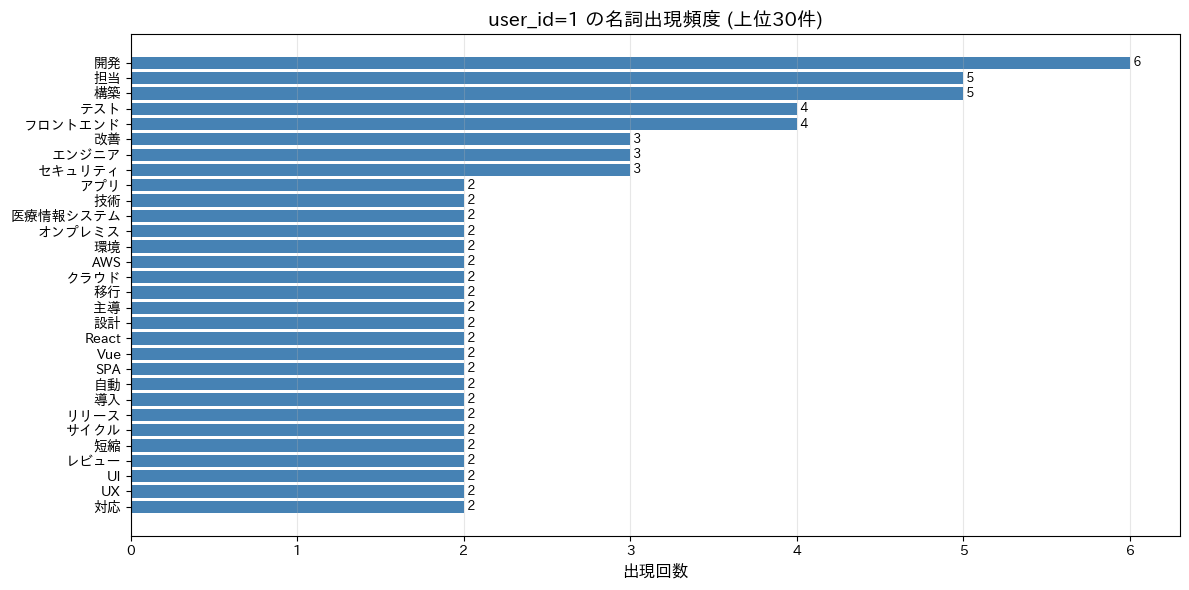

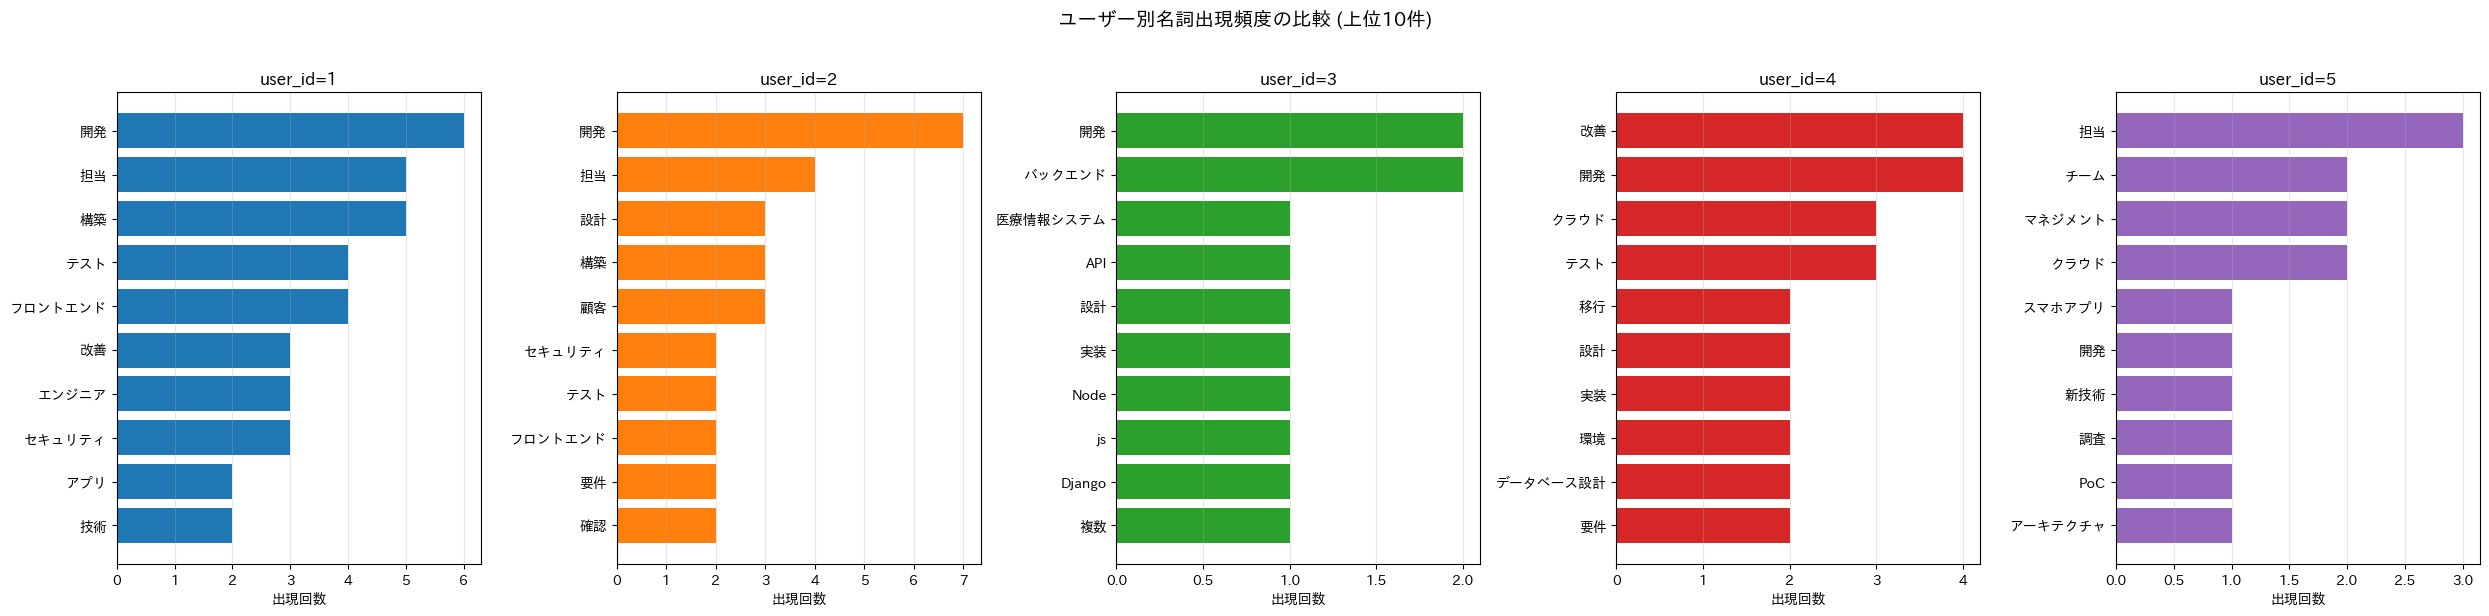

In [39]:
# 1. 特定ユーザー(user_id=1)の名詞出現頻度の棒グラフ
fig, ax = plt.subplots(figsize=(12, 6))
user_id_to_plot = 1
top_n = 30

if user_id_to_plot in user_nouns:
    nouns, counts = zip(*user_nouns[user_id_to_plot].most_common(top_n))
    ax.barh(range(len(nouns)), counts, color='steelblue')
    ax.set_yticks(range(len(nouns)))
    ax.set_yticklabels(nouns)
    ax.invert_yaxis()
    ax.set_xlabel('出現回数', fontsize=12)
    ax.set_title(f'user_id={user_id_to_plot} の名詞出現頻度 (上位{top_n}件)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # 各バーに数値を表示
    for i, count in enumerate(counts):
        ax.text(count, i, f' {count}', va='center', fontsize=9)
    
plt.tight_layout()
plt.show()

# 3. 複数ユーザーの比較(user_id 1から5)
fig, axes = plt.subplots(1, 5, figsize=(25, 6))
target_users = [1, 2, 3, 4, 5]

for idx, user_id in enumerate(target_users):
    ax = axes[idx]
    top_n_compare = 10
    
    if user_id in user_nouns:
        nouns, counts = zip(*user_nouns[user_id].most_common(top_n_compare))
        ax.barh(range(len(nouns)), counts, color=f'C{idx}')
        ax.set_yticks(range(len(nouns)))
        ax.set_yticklabels(nouns)
        ax.invert_yaxis()
        ax.set_xlabel('出現回数', fontsize=10)
        ax.set_title(f'user_id={user_id}', fontsize=12, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)

plt.suptitle('ユーザー別名詞出現頻度の比較 (上位10件)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# データ集計（全体）

## 全体で名詞が何種類あって、各名詞が何回出現したか

In [40]:
# 名詞の出現回数を集計するためのCounterオブジェクトを作成
noun_counter = Counter()

cols = ['project_name', 'description', 'role']

for col in cols:
    # 欠損値を除外し、文字列型に変換してループ処理
    for text in df[col].dropna().astype(str):
        # テキストを形態素解析してトークンを取得
        tokens = tokenizer_obj.tokenize(text, mode)
        # 全てのトークンを順番に処理
        for token in tokens:
            # 品詞が「名詞」の場合のみカウント
            if token.part_of_speech()[0] == '名詞':
                # 名詞の表層形をキーとして出現回数をインクリメント
                noun_counter[token.surface()] += 1

# 結果を出力
print(f'名詞の種類数: {len(noun_counter)}')
print(f'名詞の総出現回数: {sum(noun_counter.values())}')
print('\n出現回数上位20件:')
# 出現回数の多い順に上位20件を表示
for noun, count in noun_counter.most_common(20):
    print(f'{noun}: {count}回')

名詞の種類数: 140
名詞の総出現回数: 18275

出現回数上位20件:
担当: 805回
開発: 799回
テスト: 470回
構築: 444回
設計: 412回
改善: 332回
クラウド: 282回
チーム: 282回
プロジェクト: 254回
UI: 222回
UX: 222回
エンジニア: 222回
レビュー: 211回
顧客: 211回
調整: 211回
実施: 208回
リファクタリング: 207回
既存: 204回
システム: 204回
要件: 202回


### 可視化

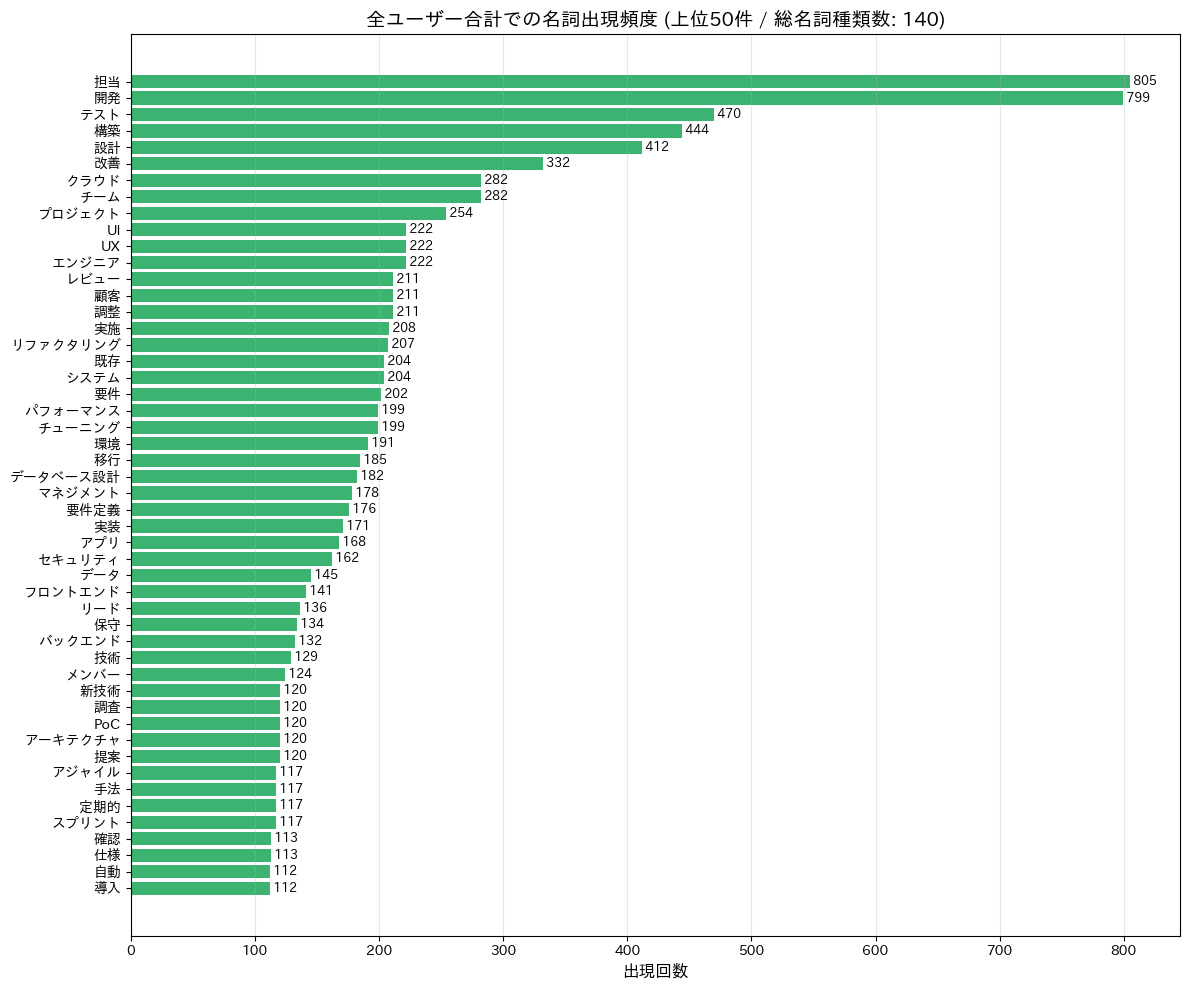

総ユーザー数: 300
総名詞種類数: 140
総名詞出現回数: 18275


In [41]:
fig, ax = plt.subplots(figsize=(12, 10))
all_nouns = Counter()
for counter in user_nouns.values():
    all_nouns.update(counter)

nouns, counts = zip(*all_nouns.most_common(50))
ax.barh(range(len(nouns)), counts, color='mediumseagreen')
ax.set_yticks(range(len(nouns)))
ax.set_yticklabels(nouns)
ax.invert_yaxis()
ax.set_xlabel('出現回数', fontsize=12)
ax.set_title(f'全ユーザー合計での名詞出現頻度 (上位50件 / 総名詞種類数: {len(all_nouns)})', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

for i, count in enumerate(counts):
    ax.text(count, i, f' {count}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"総ユーザー数: {len(user_nouns)}")
print(f"総名詞種類数: {len(all_nouns)}")
print(f"総名詞出現回数: {sum(all_nouns.values())}")

# Word2Vec（単語のベクトル化）

## 学習用のデータを準備する（コーパス）

In [42]:
# プロジェクトカタログを読み込む
project_df = pd.read_csv('../data/raw/project_catalog.csv')
project_df.head()

,id,name,description,start_date,end_date,desired_role,HTML,CSS,JavaScript,TypeScript,...,GCP,Docker,Kubernetes,MySQL,PostgreSQL,MongoDB,Git,Linux,Agile,Scrum
0,1,リアルタイム店舗在庫Webフロント刷新伴走計画,マルチベンダー体制を統括しリスクと課題の早期解消を図る。テスト自動化を拡張し回帰検証の効率と...,2021-07-19,2022-10-10,PL,1,1,1,1,...,0,1,1,1,1,1,1,1,1,0
1,2,UX向上店舗在庫分析可視化DX計画,業務フローを再定義し現行資産との共存を段階的に図る。アーキテクチャレビューでセキュリティとパ...,2022-04-29,2022-12-17,バックエンドエンジニア,1,1,1,0,...,0,0,0,1,0,0,1,1,1,1
2,3,UX向上マイナンバー業務自動化推進プロジェクト,業務フローを再定義し現行資産との共存を段階的に図る。スクラムイベントを通じてチーム間の可視化...,2024-01-31,2024-05-31,システムアーキテクト,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,4,リアルタイムクラウド移行基幹刷新強化プロジェクト,アーキテクチャレビューでセキュリティとパフォーマンスを両立する。クラウド運用ガイドラインに沿...,2021-08-02,2023-01-13,プラットフォームエンジニア,0,0,0,0,...,1,1,1,0,0,0,1,1,1,1
4,5,金融機関向けコンテンツ管理API連携刷新案件,マルチベンダー体制を統括しリスクと課題の早期解消を図る。モバイルとWebの共通コンポーネント...,2024-02-24,NaN,UIエンジニア,1,1,1,1,...,0,1,0,0,0,1,1,1,1,0


In [43]:
# 全テキストから全ての単語を抽出してWord2Vec用のコーパスを作成
def create_corpus(df, columns):
    """
    DataFrameから指定列のテキストを抽出し、全単語のリストのリストを作成
    """
    corpus = []
    
    for _, row in df.iterrows():
        # 各行の指定列を結合
        combined_text = ' '.join([str(row[col]) for col in columns if pd.notna(row[col])])
        
        # 形態素解析を実行
        tokens = tokenizer_obj.tokenize(combined_text)
        
        # 全ての表層形を抽出
        words = [token.surface() for token in tokens]
        
        if words:  # 空でない場合のみ追加
            corpus.append(words)
    
    return corpus

# ユーザー履歴のコーパスを作成
user_columns = ['project_name', 'description', 'role']
user_corpus = create_corpus(df, user_columns)

# プロジェクトカタログのコーパスを作成
project_columns = ['name', 'description', 'desired_role']
project_corpus = create_corpus(project_df, project_columns)

# 両方を結合
corpus = user_corpus + project_corpus

print(f"ユーザー職歴コーパス: {len(user_corpus)}件")
print(f"プロジェクトカタログコーパス: {len(project_corpus)}件")
print(f"結合コーパス: {len(corpus)}件")

print("\n【ユーザー職歴】最初の2件のサンプル:")
for i, doc in enumerate(user_corpus[:2]):
    print(f"{i+1}: {doc[:10]}...")

print("\n【プロジェクトカタログ】最初の2件のサンプル:")
for i, doc in enumerate(project_corpus[:2]):
    print(f"{i+1}: {doc[:10]}...")

ユーザー職歴コーパス: 911件
プロジェクトカタログコーパス: 500件
結合コーパス: 1411件

【ユーザー職歴】最初の2件のサンプル:
1: ['スマホアプリ', '開発', ' ', 'SNS', 'アプリ', '開発', '\n', '[', '主な', '担当']...
2: ['医療情報システム', '開発', ' ', 'オンプレミス', '環境', 'から', 'AWS', 'へ', 'の', 'クラウド']...

【プロジェクトカタログ】最初の2件のサンプル:
1: ['リアルタイム', '店舗', '在庫', 'Web', 'フロント', '刷新', '伴走', '計画', ' ', 'マルチ']...
2: ['UX', '向上', '店舗', '在庫', '分析', '可視化', 'DX', '計画', ' ', '業務フロー']...


In [44]:
# 全テキストから名詞のみを抽出してWord2Vec用のコーパスを作成
def create_corpus(df, columns):
    """
    DataFrameから指定列のテキストを抽出し、名詞のみのリストのリストを作成
    """
    corpus = []
    
    for _, row in df.iterrows():
        # 各行の指定列を結合
        combined_text = ' '.join([str(row[col]) for col in columns if pd.notna(row[col])])
        
        # 形態素解析を実行
        tokens = tokenizer_obj.tokenize(combined_text)
        
        # 名詞のみを抽出
        words = [token.surface() for token in tokens if token.part_of_speech()[0] == '名詞']
        
        if words:  # 空でない場合のみ追加
            corpus.append(words)
    
    return corpus

# ユーザー履歴のコーパスを作成
user_columns = ['project_name', 'description', 'role']
user_corpus = create_corpus(df, user_columns)

# プロジェクトカタログのコーパスを作成
project_columns = ['name', 'description', 'desired_role']
project_corpus = create_corpus(project_df, project_columns)

# 両方を結合
corpus = user_corpus + project_corpus

print(f"ユーザー職歴コーパス: {len(user_corpus)}件")
print(f"プロジェクトカタログコーパス: {len(project_corpus)}件")
print(f"結合コーパス: {len(corpus)}件")

print("\n【ユーザー職歴】最初の2件のサンプル:")
for i, doc in enumerate(user_corpus[:2]):
    print(f"{i+1}: {doc[:10]}...")

print("\n【プロジェクトカタログ】最初の2件のサンプル:")
for i, doc in enumerate(project_corpus[:2]):
    print(f"{i+1}: {doc[:10]}...")

ユーザー職歴コーパス: 911件
プロジェクトカタログコーパス: 500件
結合コーパス: 1411件

【ユーザー職歴】最初の2件のサンプル:
1: ['スマホアプリ', '開発', 'SNS', 'アプリ', '開発', '担当', 'ドキュメント', '作成', 'テスト', '実施']...
2: ['医療情報システム', '開発', 'オンプレミス', '環境', 'AWS', 'クラウド', '移行', '主導', '新技術', '調査']...

【プロジェクトカタログ】最初の2件のサンプル:
1: ['リアルタイム', '店舗', '在庫', 'Web', 'フロント', '刷新', '伴走', '計画', 'マルチ', 'ベンダー']...
2: ['UX', '向上', '店舗', '在庫', '分析', '可視化', 'DX', '計画', '業務フロー', '定義']...


In [45]:
# Word2Vecモデルの学習
model = Word2Vec(
    sentences=corpus,      # 学習データ
    vector_size=100,       # ベクトルの次元数
    window=5,              # コンテキストウィンドウのサイズ
    min_count=1,           # 最小出現回数（これ以下の単語は無視）
    # workers=4,             # 並列処理のワーカー数
    sg=1,                  # 0: CBOW, 1: Skip-gram
    epochs=100,             # エポック数
    negative=5,            # ネガティブサンプリング数（Skip-gram使用時）
    alpha=0.025,           # 初期学習率（デフォルト値）
    min_alpha=0.0001,      # 最小学習率
    seed=42                # 再現性のため
)

print(f"語彙数: {len(model.wv)}語")
print(f"ベクトルの次元数: {model.wv.vector_size}")

語彙数: 377語
ベクトルの次元数: 100


In [46]:
# 語彙数の確認
print(f"語彙数: {len(model.wv)}語")

# 頻出単語の確認
all_words = [word for doc in corpus for word in doc]
word_freq = Counter(all_words)
print(f"\n総単語数: {len(all_words)}")
print(f"ユニーク単語数: {len(word_freq)}")
print("\n頻出単語 Top 20:")
for word, count in word_freq.most_common(20):
    print(f"  {word}: {count}回")

語彙数: 377語

総単語数: 30623
ユニーク単語数: 377

頻出単語 Top 20:
  開発: 845回
  担当: 805回
  設計: 527回
  エンジニア: 479回
  テスト: 470回
  構築: 470回
  クラウド: 438回
  改善: 409回
  UX: 398回
  プロジェクト: 373回
  チーム: 355回
  移行: 336回
  レビュー: 332回
  データ: 329回
  UI: 303回
  リリース: 287回
  システム: 270回
  連携: 270回
  パフォーマンス: 266回
  要件: 266回


In [47]:
# モデルの保存
model.save("../results/models/word2vec_model.bin")
print("モデルを保存しました: word2vec_model.bin")

# 単語ベクトルのみを保存（より軽量）
model.wv.save("../results/models/word2vec_vectors.kv")
print("単語ベクトルを保存しました: word2vec_vectors.kv")

モデルを保存しました: word2vec_model.bin
単語ベクトルを保存しました: word2vec_vectors.kv


In [48]:
# 単語ベクトルの確認
test_words = ['開発', 'システム', 'AWS', 'React', 'Python']

for word in test_words:
    if word in model.wv:
        vector = model.wv[word]
        print(f"\n単語: {word}")
        print(f"ベクトル (最初の10次元): {vector[:10]}")
        print(f"ベクトルの形状: {vector.shape}")
    else:
        print(f"\n単語 '{word}' は語彙に含まれていません")


単語: 開発
ベクトル (最初の10次元): [ 0.02302752 -0.09519336 -0.03718251 -0.24620686  0.37350455  0.11330383
 -0.05296595  0.23417954  0.11577678 -0.48455852]
ベクトルの形状: (100,)

単語: システム
ベクトル (最初の10次元): [-0.41256407 -0.08978066  0.30892754 -0.5421392  -0.26660335  0.68872595
  0.06909809  0.15756634 -0.20413673 -0.7474367 ]
ベクトルの形状: (100,)

単語: AWS
ベクトル (最初の10次元): [-0.12184153 -0.39388096 -0.13135695 -0.77480406  0.2566881  -0.17392483
  0.17631076 -0.25698844  0.66615564 -0.04693693]
ベクトルの形状: (100,)

単語: React
ベクトル (最初の10次元): [-0.32112408 -0.10408526 -0.04652726 -0.44909993  0.17659421 -0.19276811
  0.09264405  0.09646454  0.05903989  0.2569093 ]
ベクトルの形状: (100,)

単語 'Python' は語彙に含まれていません


In [49]:
# 類似単語の検索
test_word = 'AWS'

if test_word in model.wv:
    similar_words = model.wv.most_similar(test_word, topn=10)
    print(f"\n'{test_word}' に類似する単語:")
    for word, similarity in similar_words:
        print(f"  {word}: {similarity:.4f}")
else:
    print(f"単語 '{test_word}' は語彙に含まれていません")


'AWS' に類似する単語:
  主導: 0.6757
  オンプレミス: 0.6666
  環境: 0.6509
  デプロイ: 0.5823
  ファシリテーション: 0.5681
  自動: 0.5668
  調査: 0.5620
  導入: 0.5518
  PoC: 0.5505
  A: 0.5487


In [50]:
# 類似単語の検索
test_word = 'リーダー'

if test_word in model.wv:
    similar_words = model.wv.most_similar(test_word, topn=10)
    print(f"\n'{test_word}' に類似する単語:")
    for word, similarity in similar_words:
        print(f"  {word}: {similarity:.4f}")
else:
    print(f"単語 '{test_word}' は語彙に含まれていません")


'リーダー' に類似する単語:
  テスター: 0.8287
  PG: 0.7591
  プログラマー: 0.7523
  デザイナー: 0.7467
  インフラエンジニア: 0.7365
  QA: 0.7023
  技術: 0.6375
  SNS: 0.6154
  マネージャ: 0.6133
  データベース設計: 0.6033


In [51]:
# 単語間の類似度を計算
word_pairs = [
    ('AWS', 'Azure'),
    ('React', 'Vue'),
    ('Python', 'Java'),
    ('開発', '構築'),
    ('プログラミング', '開発'),
    ('プログラミング', '構築'),
]

print("\n単語間の類似度:")
for word1, word2 in word_pairs:
    if word1 in model.wv and word2 in model.wv:
        similarity = model.wv.similarity(word1, word2)
        print(f"  {word1} - {word2}: {similarity:.4f}")
    else:
        print(f"  {word1} - {word2}: どちらかの単語が語彙に含まれていません")


単語間の類似度:
  AWS - Azure: どちらかの単語が語彙に含まれていません
  React - Vue: 0.6611
  Python - Java: どちらかの単語が語彙に含まれていません
  開発 - 構築: 0.3621
  プログラミング - 開発: 0.3459
  プログラミング - 構築: 0.4112


In [52]:
# 全単語のベクトルをDataFrameに変換して保存
word_vectors_df = pd.DataFrame(
    [model.wv[word] for word in model.wv.index_to_key],
    index=model.wv.index_to_key
)

# CSVに保存
word_vectors_df.to_csv('../data/external/word_vectors.csv')
print("\n単語ベクトルをCSVに保存しました: data/external/word_vectors.csv")
print(f"形状: {word_vectors_df.shape}")
print("\n最初の5単語:")
print(word_vectors_df.head())


単語ベクトルをCSVに保存しました: data/external/word_vectors.csv
形状: (377, 100)

最初の5単語:
             0         1         2         3         4         5         6   \
開発     0.023028 -0.095193 -0.037183 -0.246207  0.373505  0.113304 -0.052966   
担当     0.230546 -0.013267  0.357523 -0.741934 -0.189322 -0.098147 -0.326711   
設計     0.167865 -0.287880  0.086091 -0.771349  0.139351 -0.279586 -0.029737   
エンジニア  0.400855  0.391541  0.245692 -0.376548  0.254486  0.106411  0.327895   
構築     0.196126 -0.015141 -0.373264  0.181574 -0.116458  0.003781 -0.153948   

             7         8         9   ...        90        91        92  \
開発     0.234180  0.115777 -0.484559  ... -0.101691  0.180463  0.325004   
担当    -0.296277  0.268097 -0.673783  ... -0.232976 -0.073816  0.012790   
設計    -0.017280 -0.616729  0.025403  ... -0.202609 -0.198659  0.592703   
エンジニア  0.182482 -0.361031 -0.032379  ... -0.017332 -0.706812 -0.126764   
構築    -0.227023 -0.150615 -0.781399  ...  0.201761  0.037608  0.448251   

     